In [4]:
import pandas as pd
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import time
from collections import defaultdict as ddict

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

In [5]:
# bring in dataframe from csv file created at the end of Project_1_data_cleaning script

data = pd.read_csv('clean_merged_mta_data.csv')

### MVP plots

##### By station

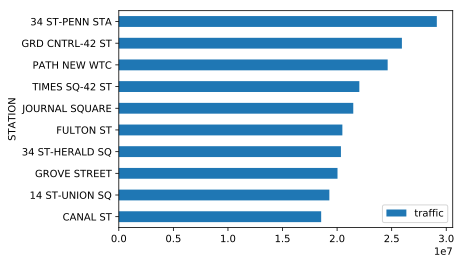

In [6]:
# compute total traffic (entries + exits, 'traffic' column) per station for the entire data period 
# and order from greatest to least
# then set as new dataframe and limit to top 10
# plot as bar graph
# save figure as png (becuase PPT won't import a svg file)

by_station = data.groupby('STATION').sum().sort_values(by=['traffic'], ascending=True)
traffic_by_station = pd.DataFrame(by_station)
by_station_top_ten = traffic_by_station.tail(10)
by_station_top_ten.plot.barh(y='traffic');
plt.savefig('by_station_top_ten.png')

##### By day of week

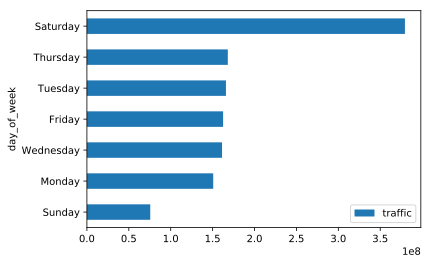

In [7]:
# compute total traffic per day of week for the entire data period 
# and order from greatest to least
# then set as new dataframe
# plot as bar graph
# Note: we did not end up using this chart

by_dow = data.groupby('day_of_week').sum().sort_values(by=['traffic'], ascending = True)
by_dow = pd.DataFrame(by_dow)
by_dow.plot.barh(y='traffic');

### Analysis for individual stations

##### Top stations Mon-Sun

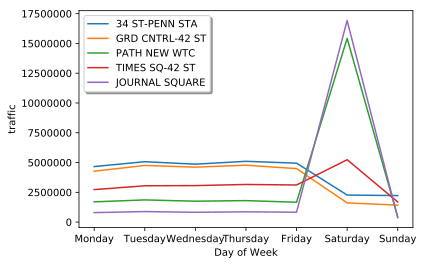

In [9]:
# line chart of total traffic per day for top stations for the entire week (Mon - Sun)

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

by_station = data.groupby(['STATION', 'day_of_week']).sum()

penn = by_station.loc['34 ST-PENN STA'].reindex(ordered_days)
gct = by_station.loc['GRD CNTRL-42 ST'].reindex(ordered_days)
wtc = by_station.loc['PATH NEW WTC'].reindex(ordered_days)
tsq = by_station.loc['TIMES SQ-42 ST'].reindex(ordered_days)
jsq = by_station.loc['JOURNAL SQUARE'].reindex(ordered_days)
fulton = by_station.loc['FULTON ST'].reindex(ordered_days)
herald = by_station.loc['34 ST-HERALD SQ'].reindex(ordered_days)
grove = by_station.loc['GROVE STREET'].reindex(ordered_days)
union = by_station.loc['14 ST-UNION SQ'].reindex(ordered_days)
canal = by_station.loc['CANAL ST'].reindex(ordered_days)

# penn.plot(y='Traffic')
# gct.plot(y='Traffic')

plt.plot(penn.loc[:, 'traffic'])
plt.plot(gct.loc[:, 'traffic'])
plt.plot(wtc.loc[:, 'traffic'])
plt.plot(tsq.loc[:, 'traffic'])
plt.plot(jsq.loc[:, 'traffic'])
# plt.plot(fulton.loc[:, 'traffic'])
# plt.plot(herald.loc[:, 'traffic'])
# plt.plot(grove.loc[:, 'traffic'])
# plt.plot(union.loc[:, 'traffic'])
# plt.plot(canal.loc[:, 'traffic'])

plt.legend(['34 ST-PENN STA','GRD CNTRL-42 ST','PATH NEW WTC','TIMES SQ-42 ST','JOURNAL SQUARE'],
           shadow = True, loc = 0);
plt.xlabel('Day of Week')
plt.ylabel('traffic')
plt.ticklabel_format(axis='y', style='plain')
plt.show();

In [ ]:
# set variable by_station
by_station = data.groupby(['STATION', 'day_of_week']).sum()

##### Top stations Mon - Fri

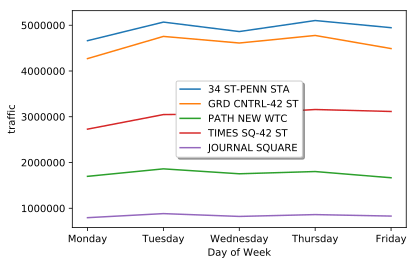

In [10]:
# line chart of total traffic per day for top stations for just Mon - Fri

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

penn = by_station.loc['34 ST-PENN STA'].reindex(ordered_days)
gct = by_station.loc['GRD CNTRL-42 ST'].reindex(ordered_days)
wtc = by_station.loc['PATH NEW WTC'].reindex(ordered_days)
tsq = by_station.loc['TIMES SQ-42 ST'].reindex(ordered_days)
jsq = by_station.loc['JOURNAL SQUARE'].reindex(ordered_days)
fulton = by_station.loc['FULTON ST'].reindex(ordered_days)
herald = by_station.loc['34 ST-HERALD SQ'].reindex(ordered_days)
grove = by_station.loc['GROVE STREET'].reindex(ordered_days)
union = by_station.loc['14 ST-UNION SQ'].reindex(ordered_days)
canal = by_station.loc['CANAL ST'].reindex(ordered_days)

# penn.plot(y='traffic')
# gct.plot(y='traffic')

plt.plot(penn.loc[:, 'traffic'])
plt.plot(gct.loc[:, 'traffic'])
plt.plot(wtc.loc[:, 'traffic'])
plt.plot(tsq.loc[:, 'traffic'])
plt.plot(jsq.loc[:, 'traffic'])
# plt.plot(fulton.loc[:, 'traffic'])
# plt.plot(herald.loc[:, 'traffic'])
# plt.plot(grove.loc[:, 'traffic'])
# plt.plot(union.loc[:, 'traffic'])
# plt.plot(canal.loc[:, 'traffic'])

plt.legend(['34 ST-PENN STA','GRD CNTRL-42 ST','PATH NEW WTC','TIMES SQ-42 ST','JOURNAL SQUARE'],
           shadow = True, loc = 0);
plt.xlabel('Day of Week')
plt.ylabel('traffic')
plt.show();

##### Soho - Tribecca

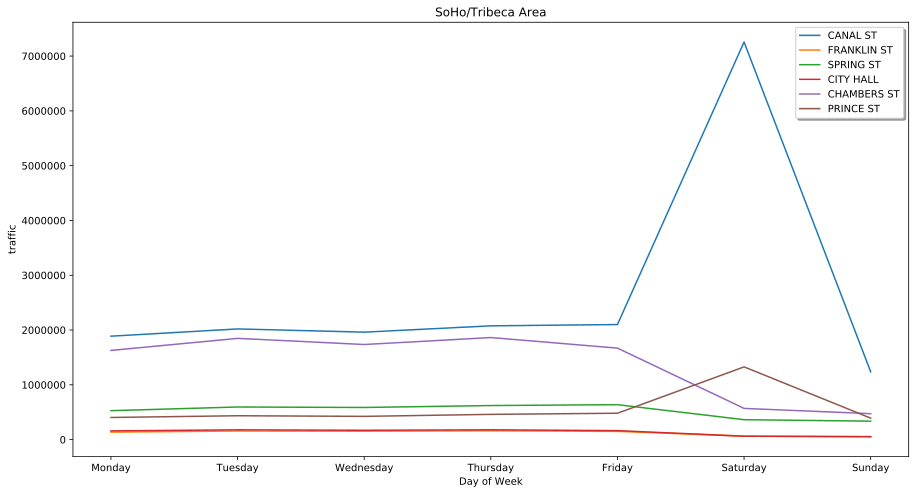

In [11]:
# SoHo - Tribecca
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig = plt.figure(figsize = (15,8))

canal = by_station.loc['CANAL ST'].reindex(ordered_days)
franklin = by_station.loc['FRANKLIN ST'].reindex(ordered_days)
spring = by_station.loc['SPRING ST'].reindex(ordered_days)
city_hall = by_station.loc['CITY HALL'].reindex(ordered_days)
chambers = by_station.loc['CHAMBERS ST'].reindex(ordered_days)
prince = by_station.loc['PRINCE ST'].reindex(ordered_days)

plt.plot(canal.loc[:, 'traffic'])
plt.plot(franklin.loc[:, 'traffic'])
plt.plot(spring.loc[:, 'traffic'])
plt.plot(city_hall.loc[:, 'traffic'])
plt.plot(chambers.loc[:, 'traffic'])
plt.plot(prince.loc[:, 'traffic'])

plt.legend(['CANAL ST','FRANKLIN ST','SPRING ST','CITY HALL','CHAMBERS ST', 'PRINCE ST'],
           shadow = True, loc = 0);
plt.title('SoHo/Tribeca Area')
plt.xlabel('Day of Week')
plt.ylabel('traffic')
plt.ticklabel_format(axis='y', style='sci')
plt.savefig('soho_tribecca', bbox_inches = 'tight')
plt.show()

##### Upper East Side

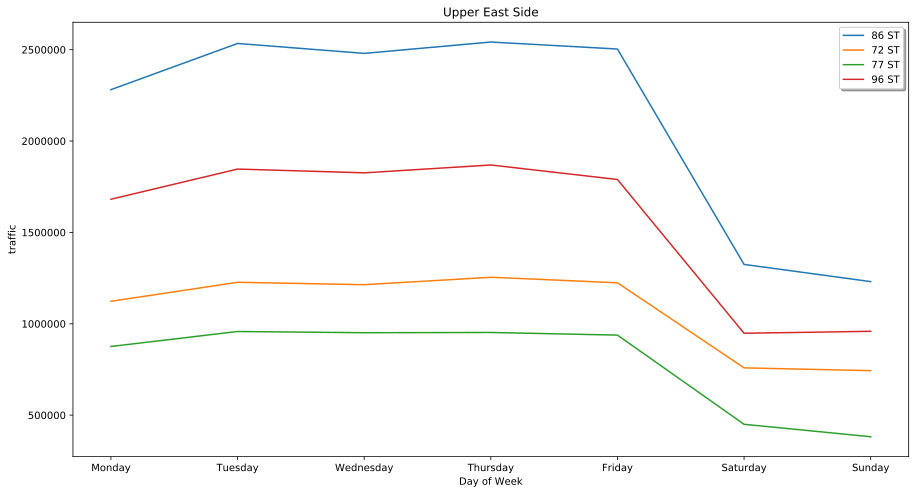

In [13]:
# Upper East Side
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fig = plt.figure(figsize = (15,8))

st86 = by_station.loc['86 ST'].reindex(ordered_days)
st72 = by_station.loc['72 ST'].reindex(ordered_days)
st77 = by_station.loc['77 ST'].reindex(ordered_days)
st96 = by_station.loc['96 ST'].reindex(ordered_days)

plt.plot(st86.loc[:, 'traffic'])
plt.plot(st72.loc[:, 'traffic'])
plt.plot(st77.loc[:, 'traffic'])
plt.plot(st96.loc[:, 'traffic'])

plt.legend(['86 ST','72 ST','77 ST','96 ST'],
           shadow = True, loc = 0);
plt.title('Upper East Side')
plt.xlabel('Day of Week')
plt.ylabel('traffic')
plt.ticklabel_format(axis='y', style='sci')
plt.savefig('upper_east', bbox_inches = 'tight')
plt.show()

##### Grand Central Station

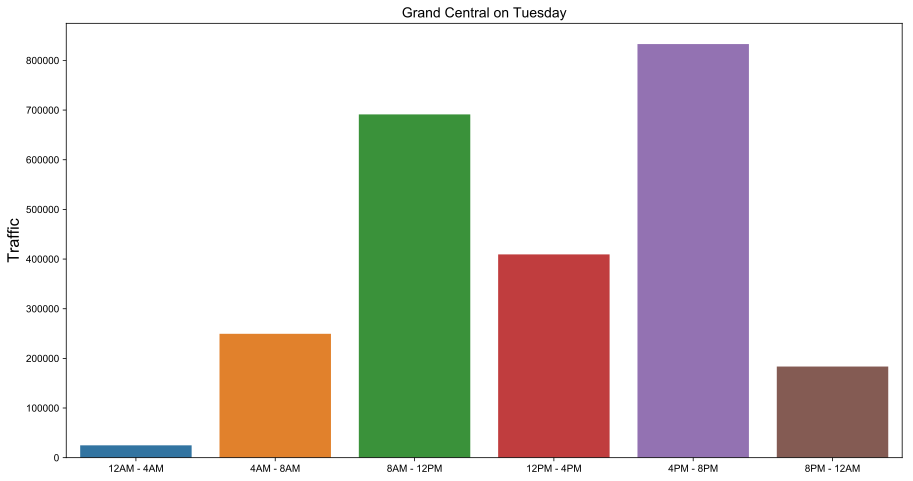

In [15]:
# Grand Central on Tuesdays

Categories = [ '12AM - 4AM', '4AM - 8AM', '8AM - 12PM', '12PM - 4PM', '4PM - 8PM', '8PM - 12AM']

ordered_times_1 = [ '04:00:00','08:00:00', '12:00:00', '16:00:00', '20:00:00', '00:00:00']
# ordered_times_2 = ['03:00:00', '07:00:00', '11:00:00', '15:00:00', '19:00:00', '23:00:00']

gct2 = data.loc[data['STATION'] == 'GRD CNTRL-42 ST'].loc[data['day_of_week'] == 'Tuesday']
gct2 = gct2.groupby('TIME').sum().sort_values(by = ['traffic'], ascending = False).reindex(ordered_times_1)

fig = plt.figure(figsize = (15,8))
ax = sns.barplot(x = Categories, y = 'traffic', data=gct2.reset_index(), label='Total').set_title('Grand Central on Tuesday', fontsize = 14)
# ax.ticklabel_format(style='sci', axis = 'y')
sns.set_style("whitegrid")
plt.ylabel('Traffic', fontsize=16)
plt.savefig('gct_on_tuesday.png', bbox_inches = 'tight')
plt.show()

In [22]:
# Grand Central on Thursdays

gct1 = gct.groupby('TIME').sum().sort_values(by = ['traffic'], ascending = False).reindex(ordered_times_1)

Categories = [ '12AM - 4AM', '4AM - 8AM', '8AM - 12PM', '12PM - 4PM', '4PM - 8PM', '8PM - 12AM']
fig = plt.figure(figsize = (15,8))
ax = sns.barplot(x = Categories, y = 'Traffic', data=gct1.reset_index(), label='Total').set_title('Grand Central on Thursday', fontsize = 14)
# ax.ticklabel_format(style='sci', axis = 'y')
sns.set_style("whitegrid")
plt.ylabel('traffic', fontsize=16)
sns.set_palette("Blues")
plt.savefig('gct_on_thursday.png', bbox_inches = 'tight')
plt.show()

KeyError: 'TIME'

##### Penn Station

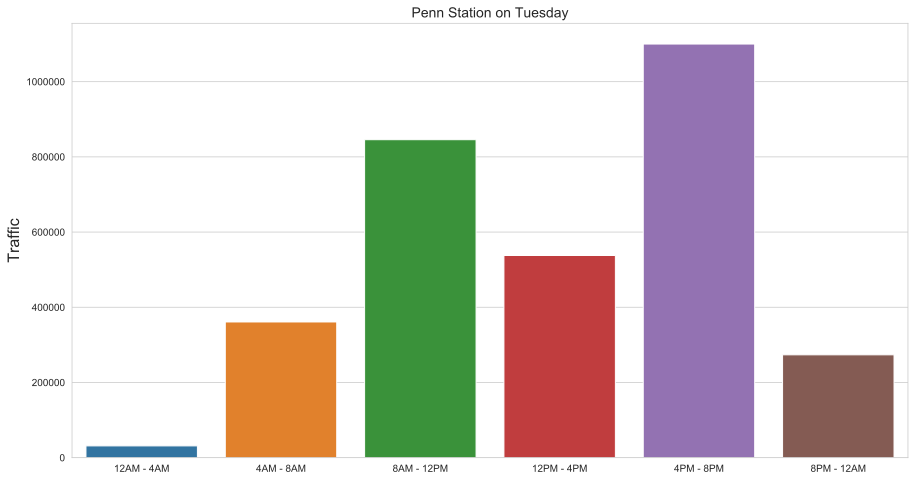

In [27]:
# Penn Station on Tuesday

penn = data.loc[data['STATION'] == '34 ST-PENN STA'].loc[data['day_of_week'] == 'Tuesday']
penn = penn.groupby('TIME').sum().sort_values(by = ['traffic'], ascending = False).reindex(ordered_times_1)
# plt.bar(ordered_times_1, tsq.loc[:, 'Traffic'])

fig = plt.figure(figsize = (15,8))
ax3 = sns.barplot(x = Categories, y = 'traffic', data=penn.reset_index(), label='Total').set_title('Penn Station on Tuesday', fontsize = 14)
# ax.ticklabel_format(style='sci', axis = 'y')
sns.set_style("whitegrid")
plt.ylabel('Traffic', fontsize=16)
plt.savefig('penn_on_tuesday.png', bbox_inches = 'tight')
plt.show()

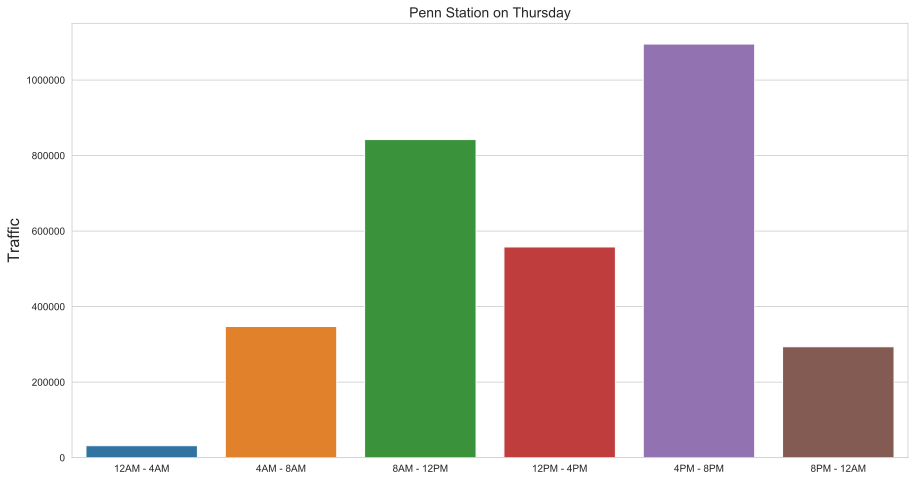

In [25]:
# Penn Station on Thursday

penn2 = data.loc[data['STATION'] == '34 ST-PENN STA'].loc[data['day_of_week'] == 'Thursday']
penn2 = penn2.groupby('TIME').sum().sort_values(by = ['traffic'], ascending = False).reindex(ordered_times_1)
# plt.bar(ordered_times_1, tsq.loc[:, 'Traffic'])

fig = plt.figure(figsize = (15,8))
ax3 = sns.barplot(x = Categories, y = 'traffic', data=penn2.reset_index(), label='Total').set_title('Penn Station on Thursday', fontsize = 14)
# ax.ticklabel_format(style='sci', axis = 'y')
sns.set_style("whitegrid")
plt.ylabel('Traffic', fontsize=16)
plt.savefig('penn_on_thursday.png', bbox_inches = 'tight')
plt.show()

##### Times Square Station

In [ ]:
sns.set_palette("Greens")

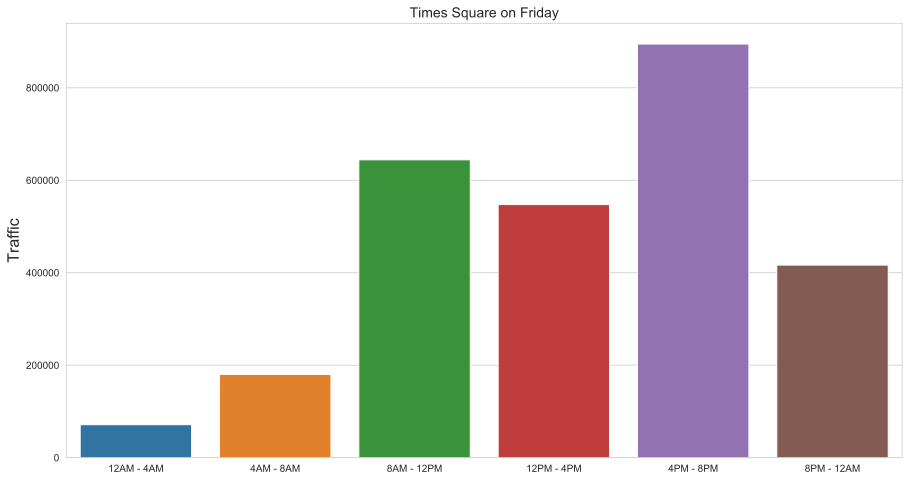

In [28]:
# Times Square on Saturdays

tsq = data.loc[data['STATION'] == 'TIMES SQ-42 ST'].loc[data['day_of_week'] == 'Friday']
tsq = tsq.groupby('TIME').sum().sort_values(by = ['traffic'], ascending = False).reindex(ordered_times_1)
# plt.bar(ordered_times_1, tsq.loc[:, 'Traffic'])

fig = plt.figure(figsize = (15,8))
ax2 = sns.barplot(x = Categories, y = 'traffic', data=tsq.reset_index(), label='Total').set_title('Times Square on Friday', fontsize = 14)
# ax.ticklabel_format(style='sci', axis = 'y')
sns.set_style("whitegrid")
sns.set_palette("Greens")
plt.ylabel('Traffic', fontsize=16)
plt.savefig('tsq_on_friday.png', bbox_inches = 'tight')
plt.show()

##### Journal Square

<BarContainer object of 6 artists>

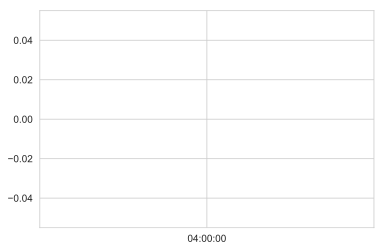

In [30]:
# Journal Square 

jsq = data.loc[data['STATION'] == 'JOURNAL SQUARE'].loc[data['day_of_week'] == 'Saturday']
jsq['TIME']
jsq = jsq.groupby('TIME').sum().sort_values(by = ['traffic'], ascending = False).reindex(ordered_times_1)
plt.bar(ordered_times_1, jsq.loc[:, 'traffic'])

##### World Trade Center

<BarContainer object of 6 artists>

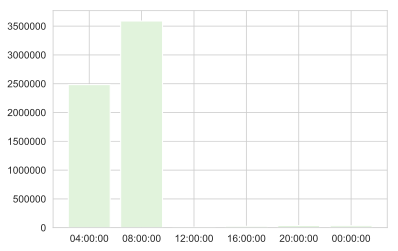

In [32]:
# World Trade Center on Saturdays

ordered_times_wtc = [0, 4, 8, 12, 16, 20]

wtc = data.loc[data['STATION'] == 'PATH NEW WTC'].loc[data['day_of_week'] == 'Saturday']
wtc['TIME'] = pd.to_datetime(wtc['TIME']).dt.round('H').dt.hour
wtc['TIME'].unique()
wtc = wtc.groupby('TIME').sum().sort_values(by = ['traffic'], ascending = False).reindex(ordered_times_wtc)
plt.bar(ordered_times_1, wtc.loc[:, 'traffic'])

##### 86th St Station

In [ ]:
sns.set_palette("Purples")

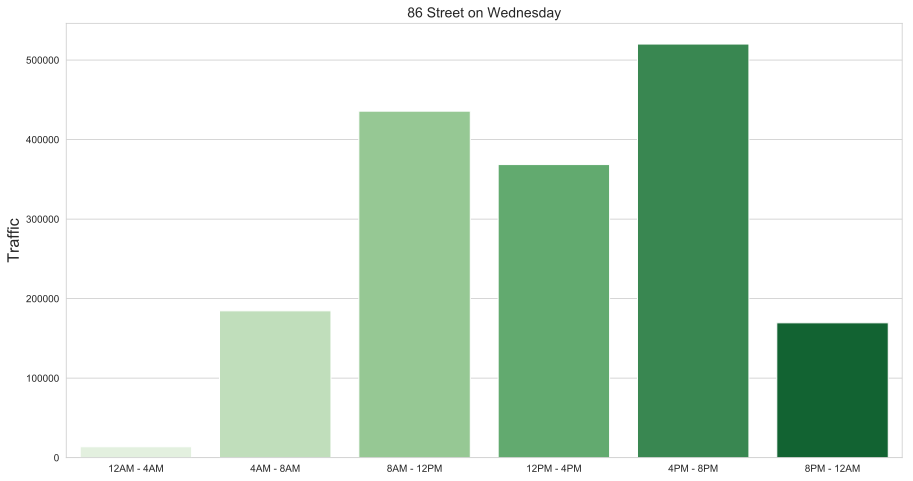

In [33]:
# 86 ST on

st86 = data.loc[data['STATION'] == '86 ST'].loc[data['day_of_week'] == 'Wednesday']
st86 = st86.groupby('TIME').sum().sort_values(by = ['traffic'], ascending = False).reindex(ordered_times_1)
# plt.bar(ordered_times_1, tsq.loc[:, 'Traffic'])

fig = plt.figure(figsize = (15,8))
ax4 = sns.barplot(x = Categories, y = 'traffic', data=st86.reset_index(), label='Total').set_title('86 Street on Wednesday', fontsize = 14)
# ax.ticklabel_format(style='sci', axis = 'y')
sns.set_style("whitegrid")
plt.ylabel('Traffic', fontsize=16)
plt.savefig('st86.png', bbox_inches = 'tight')
plt.show()

##### Canal St

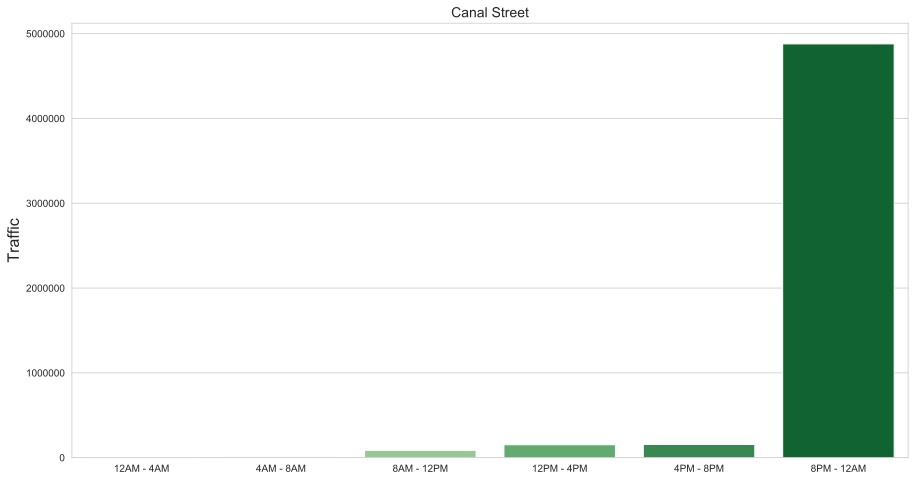

In [34]:
# Canal ST on

canal = data.loc[data['STATION'] == 'CANAL ST'].loc[data['day_of_week'] == 'Saturday']
canal = canal.groupby('TIME').sum().sort_values(by = ['traffic'], ascending = False).reindex(ordered_times_1)
# plt.bar(ordered_times_1, tsq.loc[:, 'Traffic'])

fig = plt.figure(figsize = (15,8))
ax5 = sns.barplot(x = Categories, y = 'traffic', data=canal.reset_index(), label='Total').set_title('Canal Street', fontsize = 14)
# ax.ticklabel_format(style='sci', axis = 'y')
sns.set_style("whitegrid")
plt.ylabel('Traffic', fontsize=16)
# plt.savefig('st86.png', bbox_inches = 'tight')
plt.show()

### Time series analysis attempt